# Feature maps

Súbor: feature_maps.ipynb

Program: Hospodárska informatika

Vypracovala:  Veronika Motúzová 

Bakalárska práca: Metódy hlbokého učenia pre detekciu meteorov v astronomických snímkach

Vedúci bakalárskej práce: doc. Ing. Peter Butka, PhD.

Konzultant: Ing. Viera Maslej Krešňáková

podľa: https://github.com/VieraMaslej/RadioGalaxy/blob/master/vizualization.ipynb

In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from keras.models import load_model
from skimage.color import rgb2gray
import numpy as np

In [11]:
model = load_model('alexnet_4.hdf5') 
ixs = [1,2,3] #vrstvy 
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

In [4]:
train = np.load('../data/data_final_train.npz')
x_train = train['train_data'].reshape(train['train_data'].shape[0], 128, 128, 1)

In [5]:
type(x_train[125])

numpy.ndarray

In [5]:
img = x_train[125] # výber 1 snímky z datasetu

In [6]:
img.shape

(128, 128, 1)

In [7]:
img = expand_dims(img, axis=0)

In [12]:
feature_maps = model.predict(img)

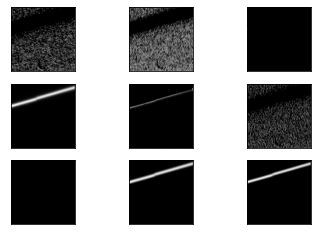

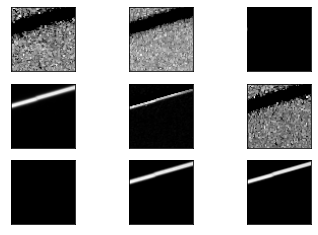

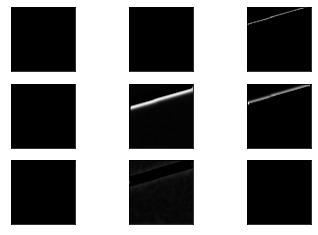

In [14]:
square = 3
for fmap in feature_maps:
	
	ix = 1
	for _ in range(square):
		for _ in range(square):
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	pyplot.show()